### Keras API Task

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


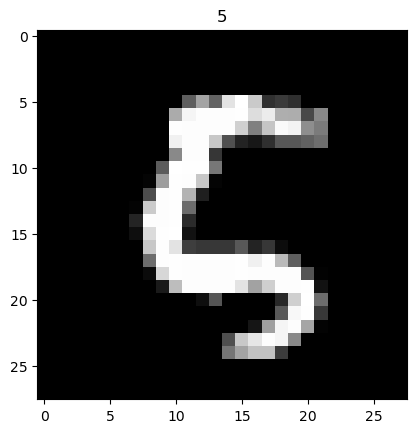

In [2]:
import matplotlib.pyplot as plt

plt.imshow(train_images[2000], cmap='gray')
plt.title(train_targets[2000])
plt.show()

In [3]:
def show_images(images, targets, ncols=8):
    figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(targets[i])

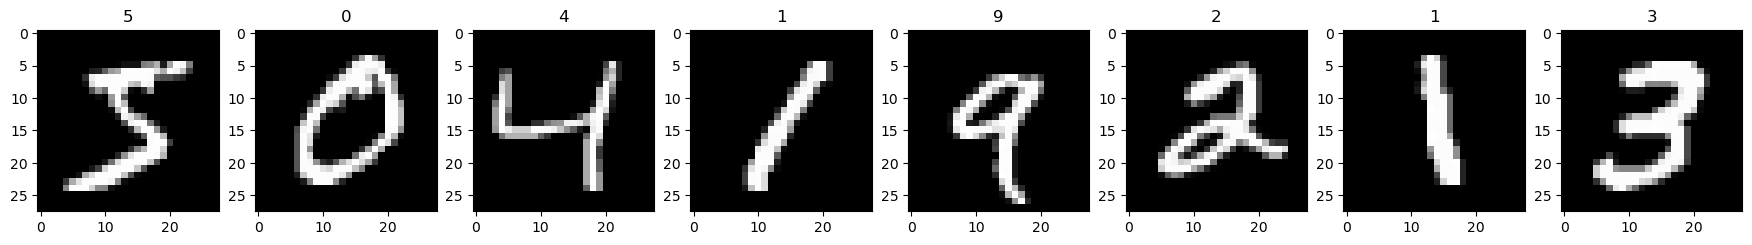

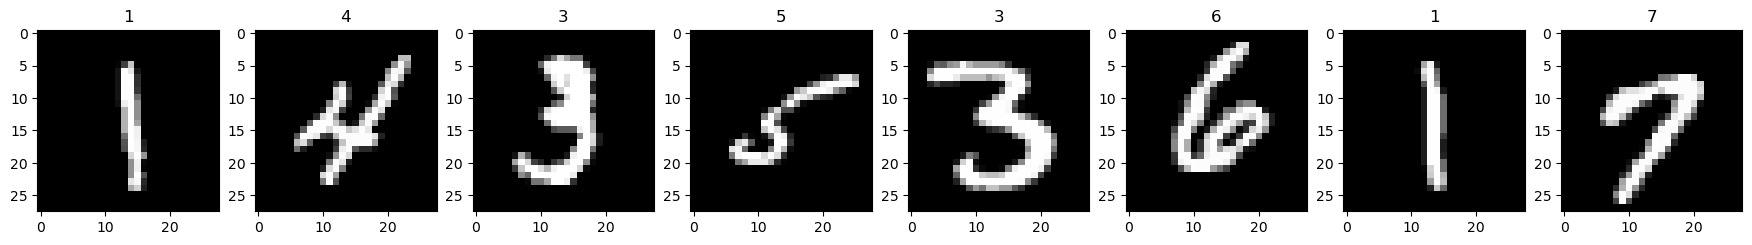

In [5]:
show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

#### Sequential API 사용

In [6]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [9]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [10]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8436 - loss: 0.5482
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9581 - loss: 0.1442
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9702 - loss: 0.1029
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9746 - loss: 0.0805
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9797 - loss: 0.0644
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9832 - loss: 0.0522
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9881 - loss: 0.0403
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9892 - loss: 0.0351
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9899 - loss: 0.0323
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9916 - loss: 0.0258
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9926 - loss: 0.0236
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [11]:
print(history.history['loss'])
print('=' * 80)
history.history['accuracy']

[0.307768315076828, 0.1375615894794464, 0.10125464200973511, 0.07922423630952835, 0.06589377671480179, 0.054310351610183716, 0.045398127287626266, 0.03870457783341408, 0.0331835001707077, 0.02849895879626274, 0.026455963030457497, 0.020992107689380646, 0.019966796040534973, 0.01793246529996395, 0.01464185118675232, 0.01432048249989748, 0.012464335188269615, 0.01388613972812891, 0.012640132568776608, 0.009374815970659256]


[0.9118499755859375,
 0.9591833353042603,
 0.9704166650772095,
 0.9752500057220459,
 0.9790833592414856,
 0.9827166795730591,
 0.9857666492462158,
 0.9879166483879089,
 0.9893166422843933,
 0.9908666610717773,
 0.9915833473205566,
 0.9931833148002625,
 0.993233323097229,
 0.9939666390419006,
 0.995199978351593,
 0.9952499866485596,
 0.9960166811943054,
 0.9952666759490967,
 0.9954333305358887,
 0.9968500137329102]

In [13]:
pred_prob = model.predict(np.expand_dims(test_images[10], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[1.0000000e+00 7.9569503e-14 1.3556675e-09 2.6629283e-17 4.5620293e-18
  5.1424365e-16 1.6766499e-12 1.2780095e-12 1.8759315e-14 3.5686623e-10]]


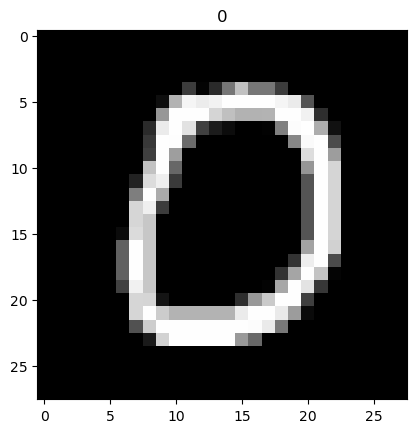

In [14]:
import matplotlib.pyplot as plt

plt.imshow(test_images[10], cmap='gray')
plt.title(pred_prob.flatten().argsort()[::-1][0])
plt.show()

In [15]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9708 - loss: 0.1385


[0.1188802719116211, 0.9745000004768372]

#### Sequential API 사용 및 Validation 진행

In [26]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [28]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=2)

Epoch 1/20
1500/1500 - 3s - 2ms/step - acc: 0.9135 - loss: 0.2959 - val_acc: 0.9405 - val_loss: 0.1918
Epoch 2/20
1500/1500 - 2s - 1ms/step - acc: 0.9597 - loss: 0.1310 - val_acc: 0.9557 - val_loss: 0.1524
Epoch 3/20
1500/1500 - 3s - 2ms/step - acc: 0.9704 - loss: 0.0953 - val_acc: 0.9598 - val_loss: 0.1328
Epoch 4/20
1500/1500 - 3s - 2ms/step - acc: 0.9764 - loss: 0.0746 - val_acc: 0.9690 - val_loss: 0.1068
Epoch 5/20
1500/1500 - 3s - 2ms/step - acc: 0.9808 - loss: 0.0602 - val_acc: 0.9654 - val_loss: 0.1134
Epoch 6/20
1500/1500 - 3s - 2ms/step - acc: 0.9839 - loss: 0.0506 - val_acc: 0.9690 - val_loss: 0.1069
Epoch 7/20
1500/1500 - 3s - 2ms/step - acc: 0.9870 - loss: 0.0393 - val_acc: 0.9686 - val_loss: 0.1172
Epoch 8/20
1500/1500 - 3s - 2ms/step - acc: 0.9885 - loss: 0.0342 - val_acc: 0.9700 - val_loss: 0.1178
Epoch 9/20
1500/1500 - 2s - 2ms/step - acc: 0.9902 - loss: 0.0297 - val_acc: 0.9707 - val_loss: 0.1147
Epoch 10/20
1500/1500 - 2s - 2ms/step - acc: 0.9905 - loss: 0.0275 - val_

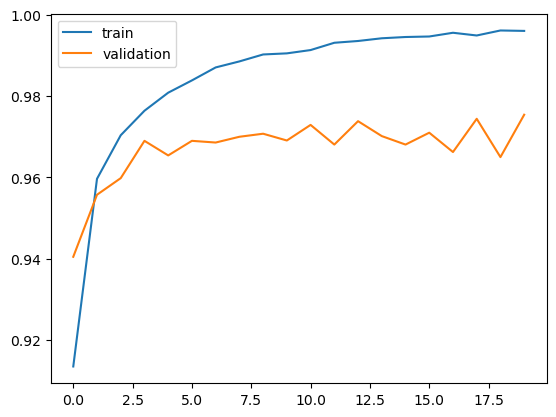

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[1.0000000e+00 9.2761337e-28 1.0522352e-19 8.9191461e-26 2.3922357e-12
  2.4486223e-33 1.2605448e-16 2.8540866e-15 2.2732747e-21 6.8296007e-12]]


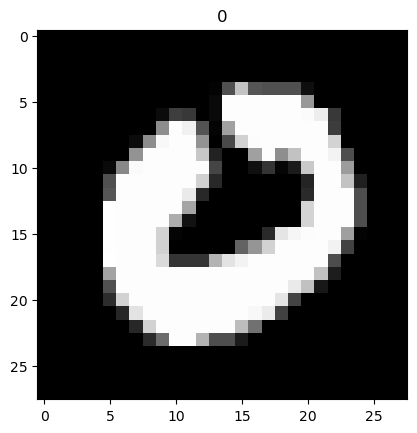

In [31]:
import matplotlib.pyplot as plt

pred_prob = model.predict(np.expand_dims(test_images[25], axis=0))
print(pred_prob)

plt.imshow(test_images[25], cmap='gray')
plt.title(pred_prob.flatten().argsort()[::-1][0])
plt.show()

In [32]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - acc: 0.9708 - loss: 0.1579 


[0.13260188698768616, 0.9753000140190125]

#### Functional API 사용

In [33]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [42]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np


def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [43]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [44]:
model = create_model()
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [46]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8185 - loss: 0.6210 - val_acc: 0.9459 - val_loss: 0.1788
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9524 - loss: 0.1565 - val_acc: 0.9619 - val_loss: 0.1257
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9693 - loss: 0.1025 - val_acc: 0.9582 - val_loss: 0.1401
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9754 - loss: 0.0823 - val_acc: 0.9672 - val_loss: 0.1051
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9809 - loss: 0.0662 - val_acc: 0.9695 - val_loss: 0.0993
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9835 - loss: 0.0548 - val_acc: 0.9706 - val_loss: 0.0970
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9866 - loss: 0.0436 - val_acc: 0.9725 - val_loss: 0.0926
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9886 - loss: 0.0369 - val_acc: 0.9711 - val_loss: 0.0951
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

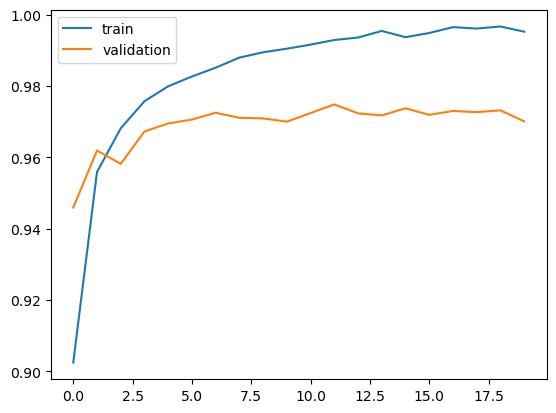

In [47]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [48]:
pred_prob = model.predict(np.expand_dims(test_images[8500], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[1.3276119e-24 4.4718398e-21 4.1018121e-18 3.7911238e-19 1.0000000e+00
  2.0852783e-21 1.4243267e-22 1.6814583e-14 1.2944233e-21 4.8280515e-13]]


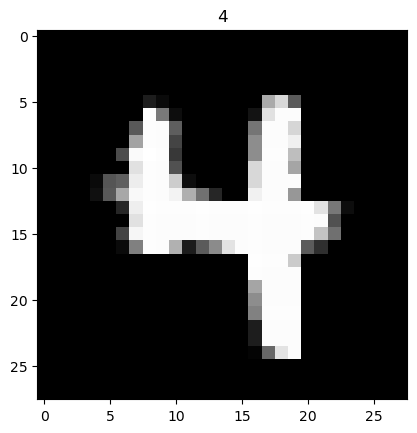

In [49]:
import matplotlib.pyplot as plt

plt.imshow(test_images[8500], cmap='gray')
plt.title(pred_prob.flatten().argsort()[::-1][0])
plt.show()